By 
### Bernardo Vimpi



## DATA ANALYSIS AND VISUALIZATION


This project aims at performing Data Analysis and Visualization of each feature and understand if they have any effect on job placement/salary. We analyze and plot each feature. Also, further analysis is necessary to substantiate the conclusions arrived in this project. 


### DATA SOURCE

The dataset hereby used was extracted from https://www.kaggle.com/ The direct link of the "Placement_data_Full_Class" can be accessed via  https://www.kaggle.com/benroshan/factors-affecting-campus-placement

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### DATA IMPORT

In [2]:
data = pd.read_csv('Placement_Data_Full_Class.csv')

In [3]:
data.shape

(215, 15)

In our dataset we have 15 columns or variables and 215 rows or observations. Please note that the first row in this dataset has an index of 0. 

### Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [5]:
data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

### Describing Variables

Some of the variables in our dataset are coded in a very unique manner. In this stage of our analysis, we describe those variables below:

sl_no = Serial Number

ssc_p = Secondary Education Percentage - 10th Grade

ssc_b = Borard of Education- Central/Others

hsc_p = Higher Secondary Education percentage - 12th Grade

hsc_b = Board of Education - Central/Others

hsc_s = Specialization in Higher Secondary Education

degree_p = Degree Percentage

degree_t = Under Graduation(Degree type)- Field of degree education

workex = Work Experience 

mba_p = MBA percentage

etest_p = Employability test percentage (conducted by college)



In [6]:
data.head(6)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,Not Placed,NaN


In [7]:
data.tail(6)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
209,210,M,62.0,Central,72.0,Central,Commerce,65.0,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.0
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


## DATA CLEANING

One of the columns in the dataset is "serial number". These values are irrelevant for our analysis. We proceed by cleaning them from the dataset.

In [8]:
data.drop('sl_no', axis=1, inplace=True)

### FEATURE EXPLORATORY DATA ANALYSIS. 

Here we explore and understand the data by looking at the features. This can be a tedious process but it is very helpful in order for us to get a good grasp of the dataset. 

### Using Seaborn to visualize the entire dataset using pairplot

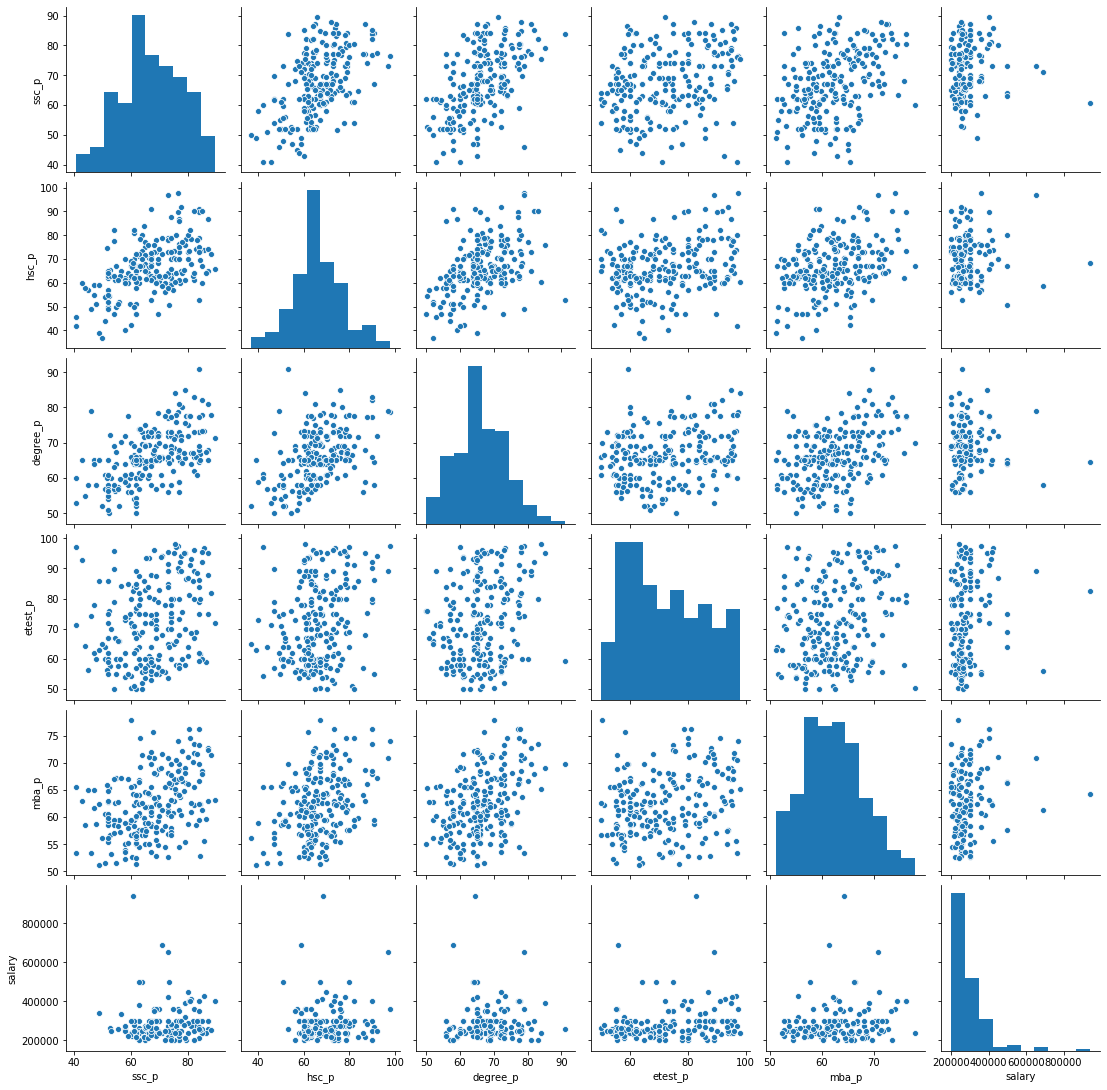

In [9]:
sns.pairplot(data)# using seaborn to display the various plots and distribution of the data using pairplot

#### Feature  1: GENDER

Does the variable "Gender" affect Placement? Lets explore here:

In [10]:
data.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

We have almots double the number of male than of female.

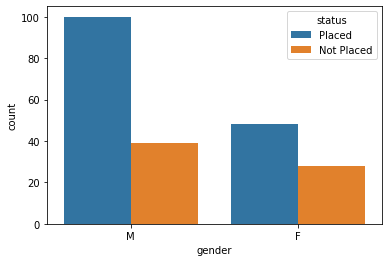

In [11]:
sns.countplot("gender", hue="status", data=data)
plt.show()

Lets now do another plot but this time we'll leave ou the students who are not place and make the graph leave out the NaN valyes for salary.

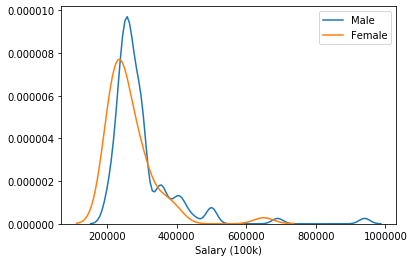

In [12]:
sns.kdeplot(data.salary[ data.gender == "M"])
sns.kdeplot(data.salary[ data.gender == "F"])
plt.legend(["Male", "Female"])
plt.xlabel("Salary (100k)")
plt.show()

Lets now run a boxplot for gender as well

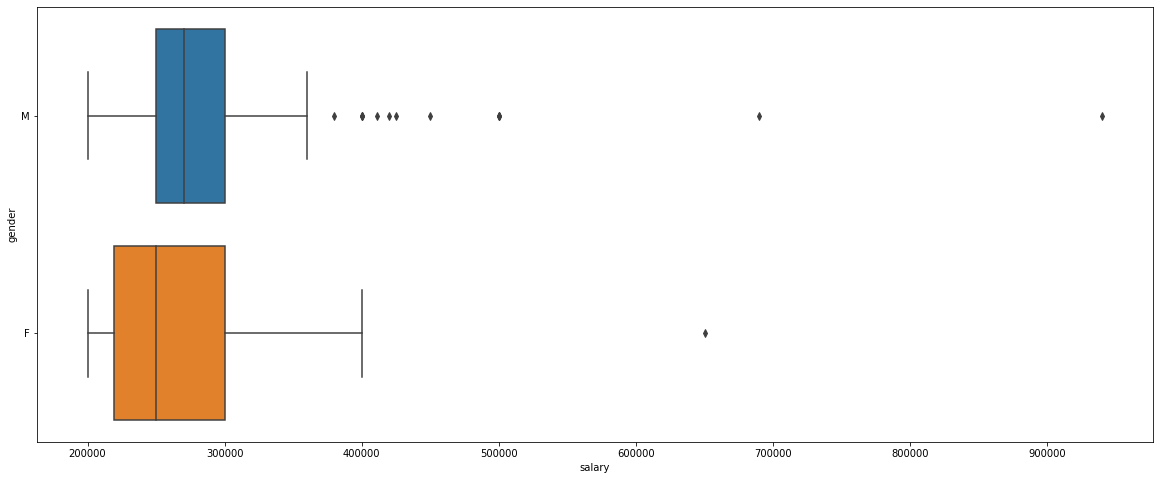

In [13]:
plt.figure(figsize =(20,8))
sns.boxplot("salary", "gender", data=data)
plt.show()

Observations: We have a sample of 139 Males to 76 Female students. We also have 4o male and 30 female students who are not placed. In relation to female students, male students have a relatively higher placement. There also more aoutliers for male since male students are getting high CTC jobs. Also, on average, male students get offered higher salary than female.

#### Feature 2: Board of Education(ssc_b) & Secondary Education(ssc_p)

Here we evaluate the features of Board of Education and Secondary Education and its effect in placements.

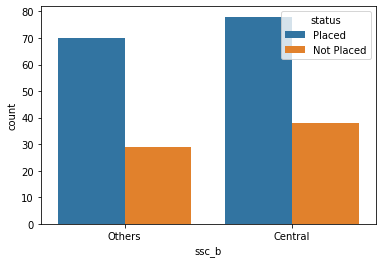

In [14]:
sns.countplot("ssc_b", hue="status", data=data)
plt.show()

Board of Education does not have that much effect on placement status

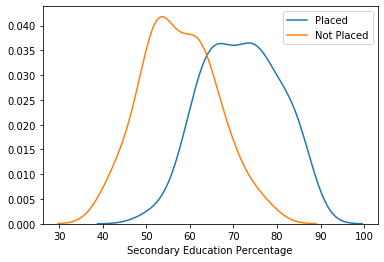

In [15]:
sns.kdeplot(data.ssc_p[ data.status == "Placed"])
sns.kdeplot(data.ssc_p[ data.status == "Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Secondary Education Percentage")
plt.show()

These are the insights we get from the plot:

A: All students who have Secondary Education Percentage above 90% are placed

B: All students with Secondary Education Percentage below 50% are not placed.

C: On average, students with good Secondary Education Percentage are placed.
    

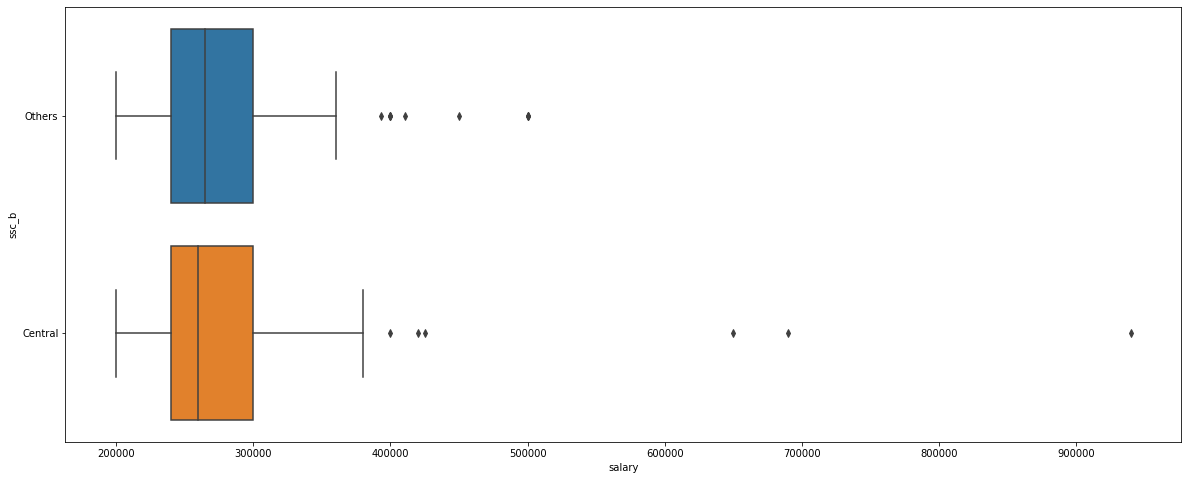

In [16]:
plt.figure(figsize=(20,8))
sns.boxplot("salary", "ssc_b", data=data)
plt.show()

We have outliers on both. However, students that are from Central Board are getting higher paying jobs.

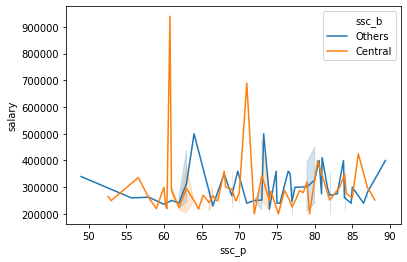

In [17]:
sns.lineplot("ssc_p", "salary", hue="ssc_b", data=data)
plt.show()

Here we don't see a specific consistent pattern or correlation between Secondary Education Percentage and Salary.

Also, Board of Education doesn't have an effect on Salary.

#### Feature 3: Higher Secondary Education Percentage(hsc_p), Board of Education(hsc_b) and Specialization in Higher Secondary Education(hsc_s)

Let's take the first feature: Does Higher Secondary School have any effect on Placements?

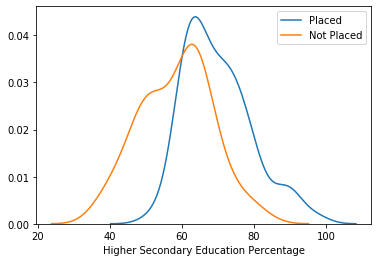

In [18]:
sns.kdeplot(data.hsc_p[ data.status == "Placed"])
sns.kdeplot(data.hsc_p[ data.status == "Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Higher Secondary Education Percentage")
plt.show()

We have more placement for percentage above 65 and placement significantly drops below 60%.

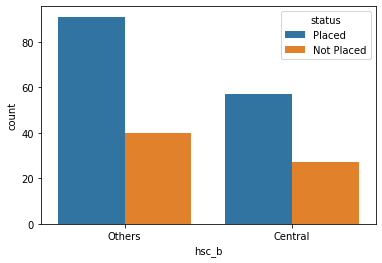

In [19]:
sns.countplot("hsc_b", hue="status", data=data)
plt.show()

Once again, we can see that Education Board does not affect placement status that much.

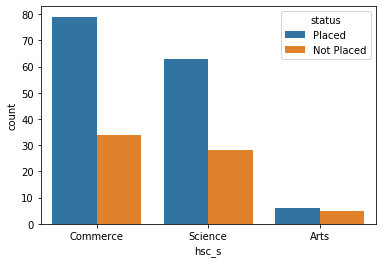

In [20]:
sns.countplot("hsc_s", hue ="status", data=data)
plt.show()

The number of students who specialize in Arts is very low.

We also have a ratio of about 2:1 place:unplace for Science and Commerse students.

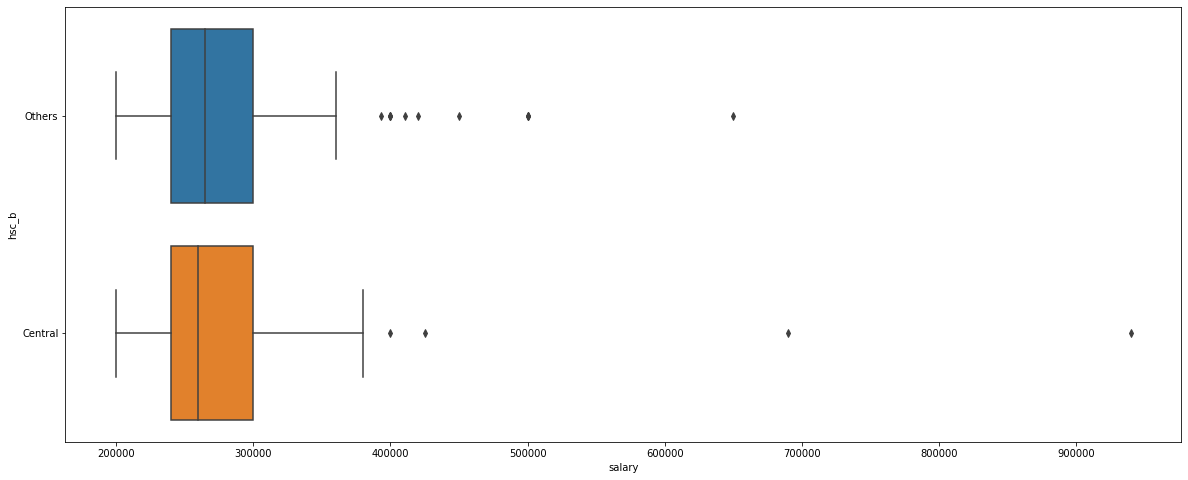

In [21]:
plt.figure(figsize =(20,8))
sns.boxplot("salary", "hsc_b", data=data)
plt.show()

Also, we have outliers on both Central and Others. Board does not have an effect on getting a high paid job. However, we can also see that students from Central Board have had a good high paying jobs. 

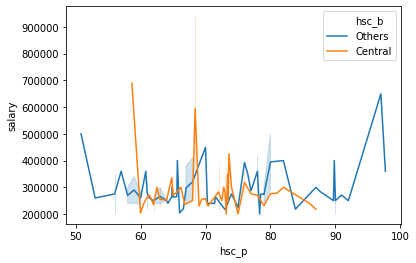

In [22]:
sns.lineplot("hsc_p", "salary", hue="hsc_b", data=data)
plt.show()

Here we see that Central and Others have high salaries and also high salary for both high and low percentage. Therefore, these two features don't affect salary.

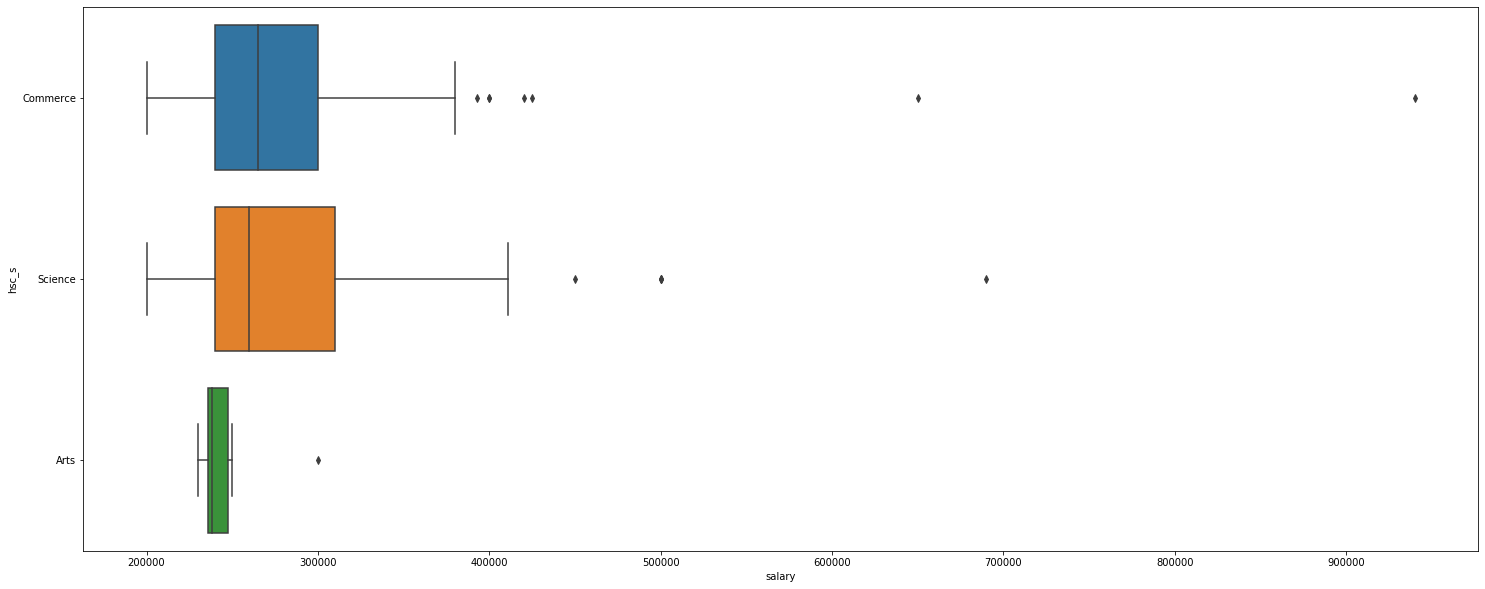

In [23]:
plt.figure(figsize =(25,10))
sns.boxplot("salary", "hsc_s", data=data)
plt.show()

We can't really say for sure due to only few samples of students who majored in Arts. We also can see that they are not getting high salaries.

However, we can see that the placement for commerse students is relatively high.

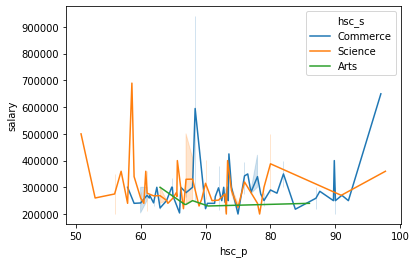

In [24]:
sns.lineplot("hsc_p", "salary", hue="hsc_s", data=data)
plt.show()

Students with Arts specialization have relatively (comparatively) low salary.

#### FEATURE 4: Degree Percentage(degree_p)  & Under Graduation Degree Field) 

To What extent does the Under Graduate affect placement?

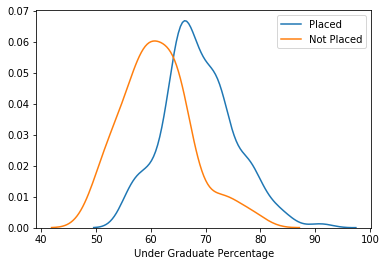

In [25]:
sns.kdeplot(data.degree_p[data.status == "Placed"])
sns.kdeplot(data.degree_p[data.status== "Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Under Graduate Percentage")
plt.show()

Here we do have an overlap. However, we can see that there higher placement above 65%, while under graduation least 50% to get placement.

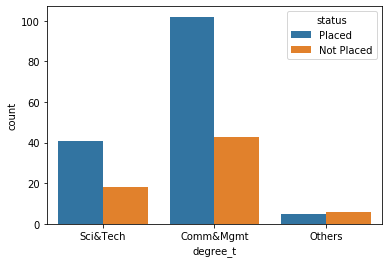

In [26]:
sns.countplot("degree_t", hue="status", data=data)
plt.show()

The "Others" category has fewer students which is challenging to make decisions based on that. We also have a ratio of 2:1 of place:unplaced for students in Science and Commerse

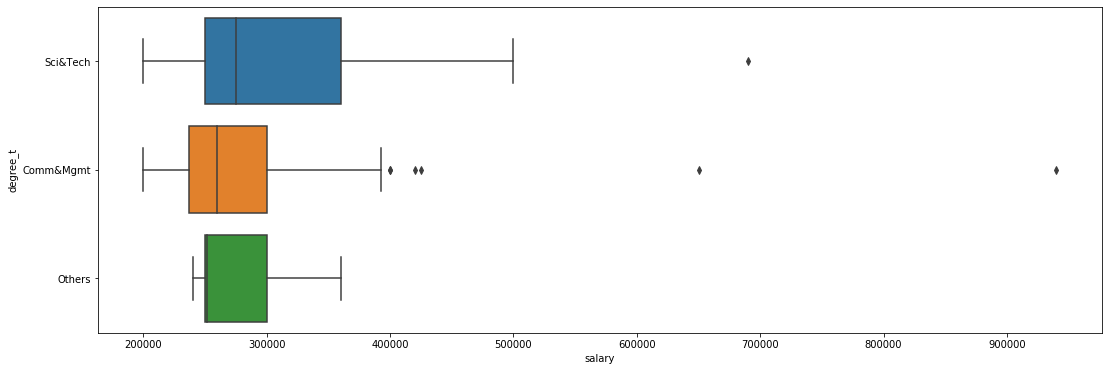

In [27]:
plt.figure(figsize=(18,6))
sns.boxplot("salary", "degree_t", data=data)
plt.show()

Students in Science and Technology on avergare get higher salary. Also students with degree in Commerce & Management are getting high paid jobs.

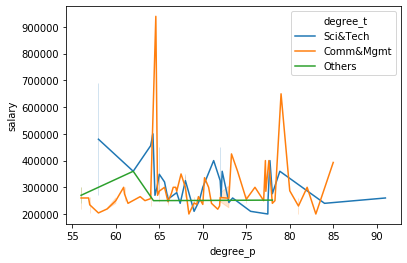

In [28]:
sns.lineplot("degree_p", "salary", hue="degree_t", data=data)
plt.show()

Commerce students have a trend of getting high paid salary jobs.

#### FEATURE 5: WORK EXPERIENCE(workex)

This seems to be counter intuitive but does work experience have an effect on placements?

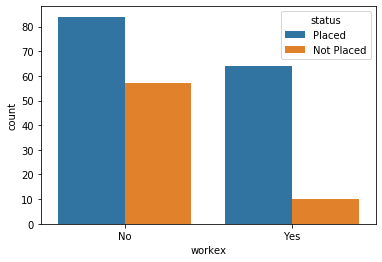

In [29]:
sns.countplot("workex", hue="status", data=data)
plt.show()

There is an effect on placement. We can see that very few students with work experience are not getting placed.

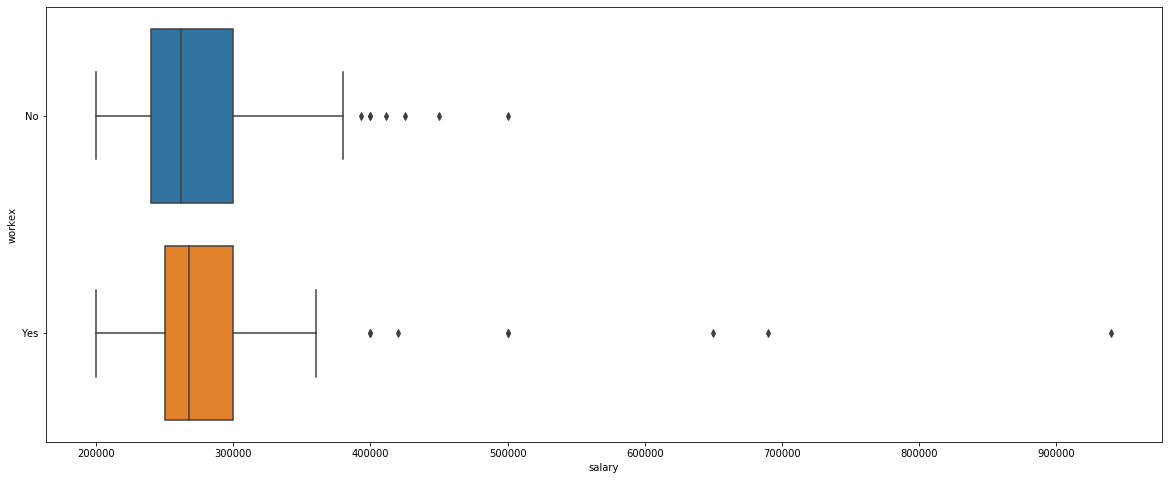

In [30]:
plt.figure(figsize=(20,8))
sns.boxplot("salary", "workex", data=data)
plt.show()

We have outliers on both sides. However, student who do have experience are getting placement in jobs with high salary since they have average salary and base salary too.

#### FEATURE 6: EMPLOYABILITY TEST PERCENTAGE(etest_p)

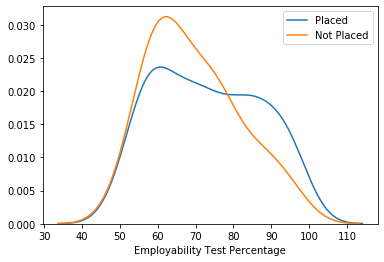

In [31]:
sns.kdeplot(data.etest_p[data.status == "Placed"])
sns.kdeplot(data.etest_p[data.status == "Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Employability Test Percentage")
plt.show()

We have high overlap here too and the feature that does not affect placement status that much. We have 50 to 70 that fall into the "Not Placed" and more than 80% in the "Placed"

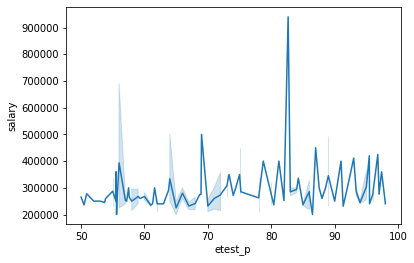

In [32]:
sns.lineplot("etest_p", "salary", data=data)
plt.show()

This feature does not affect placement that much which is a surprising funding.

#### FEATURE 7: SPECIALISATION (POST GRADUATE SPECIALIZATION)

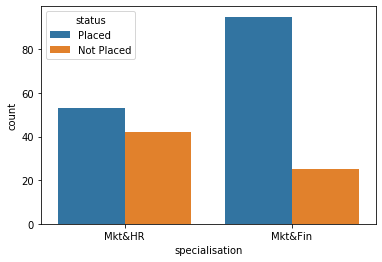

In [33]:
sns.countplot("specialisation", hue="status", data=data)
plt.show()

This feature does affect placement. There is a significantly very lowe non-place students in the Mk&Fin specialisation.

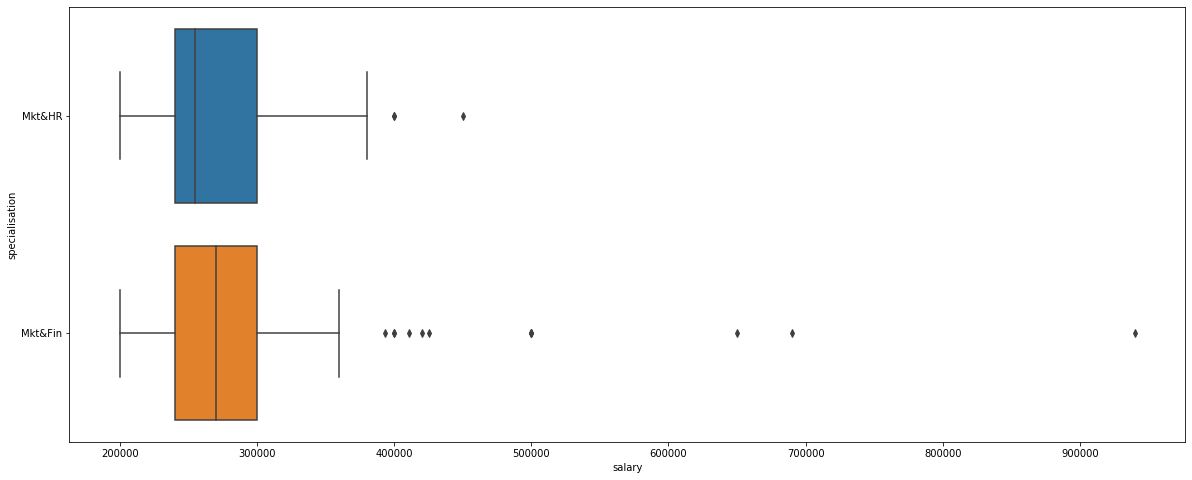

In [34]:
plt.figure(figsize=(20,8))
sns.boxplot("salary", "specialisation", data=data)
plt.show()

Mkt&Fin students have high paid jobs.

#### FEATURE 8: MBA PERCENTAGE(mba_p)

Does the MBA Percentage feature affect placement? Lets explore next:

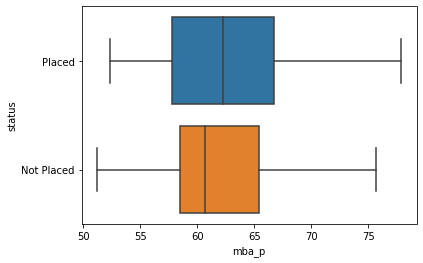

In [35]:
sns.boxplot("mba_p", "status", data=data)
plt.show()

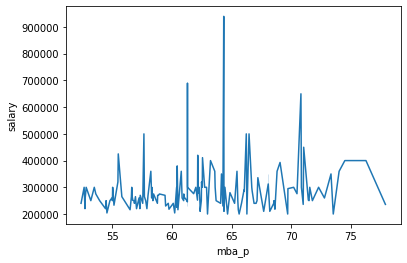

In [36]:
sns.lineplot("mba_p", "salary", data=data)
plt.show()

MBA percentage does not affect salary that much. 

### CONCLUSION

This was an exercise of Data Analysis via Data Visualization. The conclusions arrived from each of the plots, could significantly change if we apply the same dataset in regression model such as Multilinear Regression. However, that can be done in another project since it is not the scope of this one. Also, analysing one feature at a time gives us a limited and skewed understanding of the explanatory power of each feature. For further projects we can also conduct additional analysis of the descriptive statistics for all features. Nonetheless, this was a great exercise to sharpen our skills and continue to improve. Thanks in advance for any feedback!


### Reference Guide

Data Source is from Kaggle: https://www.kaggle.com/benroshan/factors-affecting-campus-placement

Seaborn 0.11.0 Documentation guide: https://seaborn.pydata.org/generated/seaborn.pairplot.html 

Data Analysis with Python (Youtube Toturial Video) https://www.youtube.com/watch?v=r-uOLxNrNk8&t=6102s

Pythod documentation tutorial: https://docs.python.org/3/tutorial/index.html

Thank you

#### Bernardo Vimpi
